# Downsampling using PaleoBeasts

Author : Alexander James

Intro : The purpose of this notebook is to demonstrate how to easily downsample timeseries using the downsampling module from PaleoBeasts. In it we demonstrate the usage of the function `downsample` using several of the available parameters.

Note that to run this notebook at the moment it needs to be moved into the directory containing the `utils` folder. This will remain true until PaleoBeasts is on PyPi and is importable.

In [7]:

import pyleoclim as pyleo

In [8]:
#stopgap until paleobeasts is a package

import sys
import os

cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)

sys.path.append(parent_dir)
from utils.downsample import downsample

In [9]:
#Loading a toy data, evenly spaced series
series = pyleo.utils.load_dataset('SOI').interp()

First we'll plot our original, evenly spaced series, and its resolution as a function of time. This is largely for comparison purposes, so we can refer back and see what the downsampling function has done later on.

/Users/alexjames/GitHub/Pyleoclim_util/pyleoclim/utils/tsbase.py:529: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats = st.describe(res)
/Users/alexjames/miniconda3/envs/docs/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1405: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(a, axis, bias=bias)
/Users/alexjames/miniconda3/envs/docs/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1406: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(a, axis, bias=bias)


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Time [year C.E.]', ylabel='resolution [year C.E.]'>)

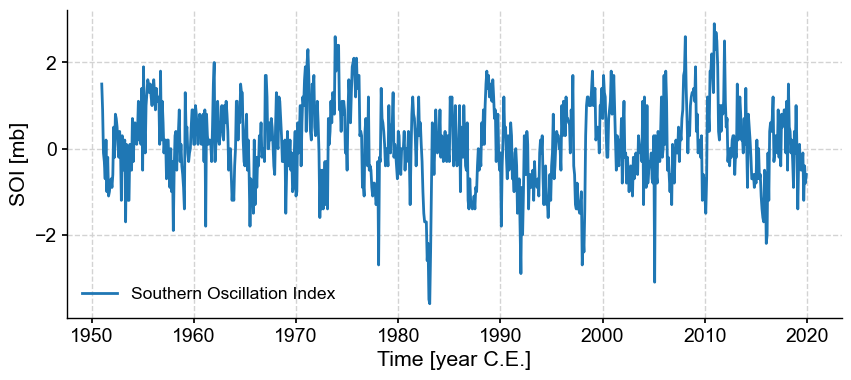

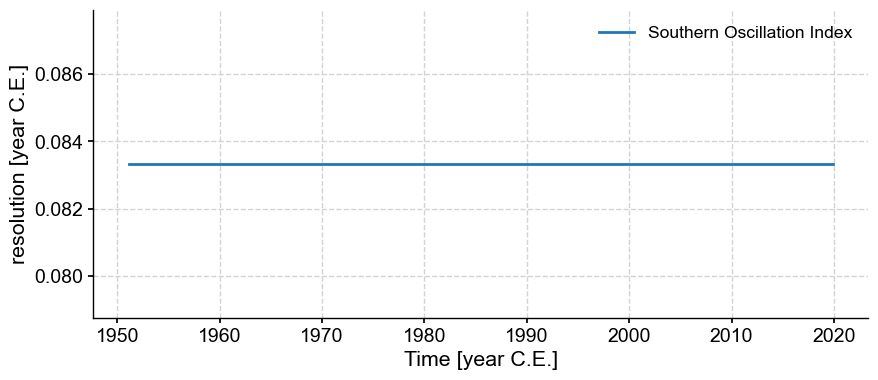

In [10]:
#Plotting the original data series
series.plot()
#Plotting the resolution of the original data series
series.resolution().plot()

### Method = 'exponential'

Now, we apply our downsampling function using `method='exponential'` (default setting). This means that the difference between subsequent index values in this downsampled version of our series will be drawn from an exponential distribution defined by the parameter `param` (traditionally denoted as `lambda`). Default parameters mean that `param` (`lambda`) is set to 1.

The parameter lambda in the exponential distribution controls the rate at which the values increase or decrease. Higher values of lambda result in a steeper exponential curve, leading to larger differences between subsequent index values. On the other hand, lower values of lambda produce a flatter curve, resulting in smaller differences between subsequent index values.

For example, if lambda is set to a higher value like 3, the downsampling function will generate larger differences between index values, leading to a more pronounced downsampling effect. Conversely, if lambda is set to a lower value like 0.5, the downsampling function will produce smaller differences between index values, generally resulting in a less aggressive downsampling effect.

In [11]:
#Downsampling the data series using the default parameters (method='exponential' and param=1)
downsampled_series = downsample(series,seed=42,method='exponential',param=[2])

/Users/alexjames/miniconda3/envs/docs/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(<Figure size 1100x800 with 2 Axes>,
 {'res': <Axes: xlabel='Time [year C.E.]', ylabel='resolution [year C.E.]'>,
  'res_hist': <Axes: xlabel='Counts'>})

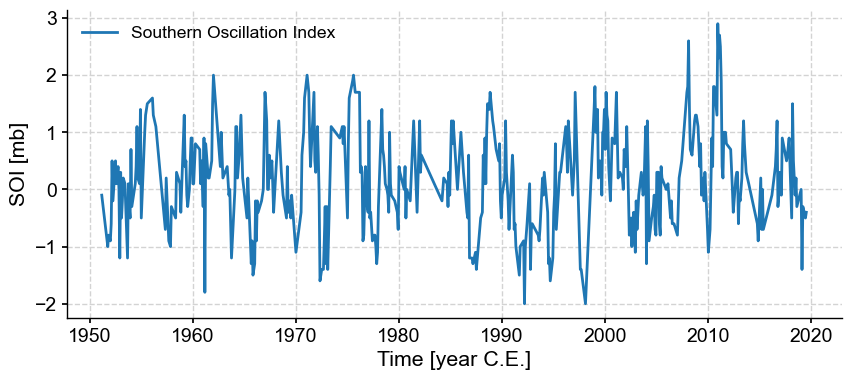

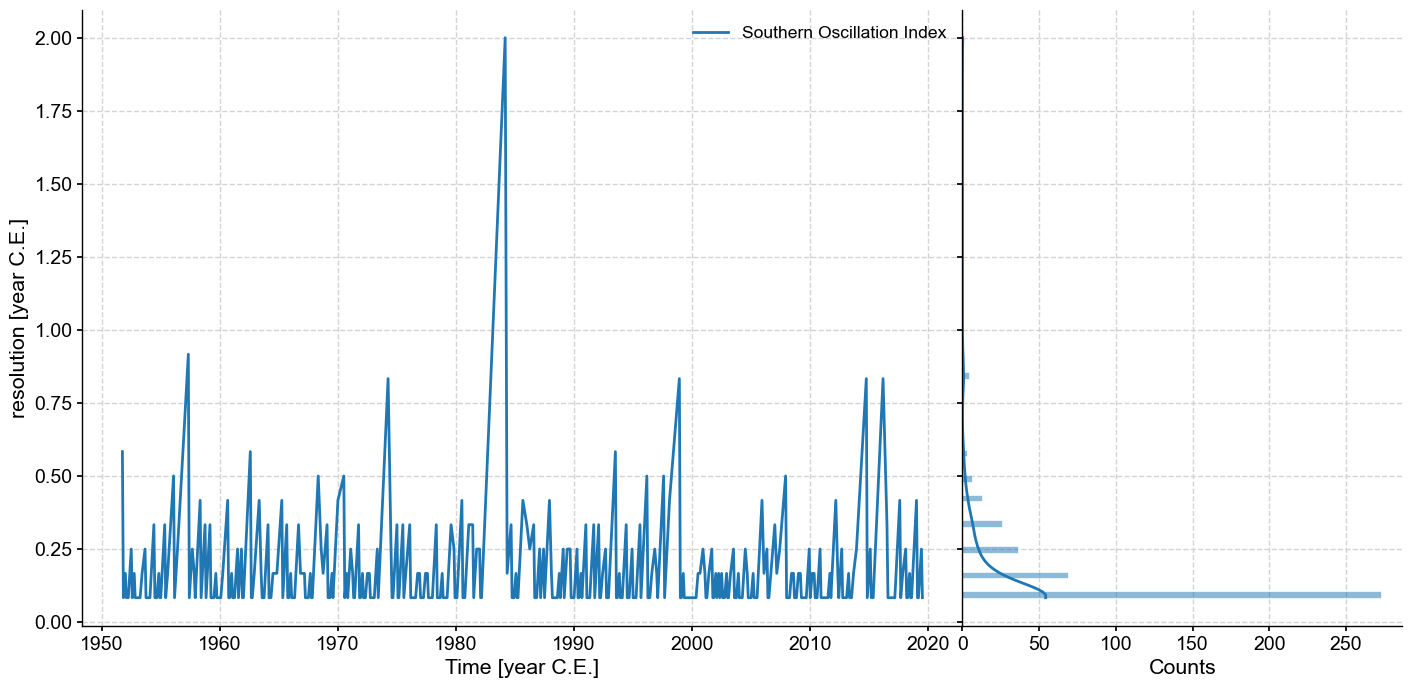

In [12]:
#Plotting the downsampled data series
downsampled_series.plot()
downsampled_series.resolution().dashboard()

### Method = 'poisson'

Here we use `method='poisson'`, where the key parameter is now the 'rate'. This is again specified through the `param` argument.

The 'rate' parameter in the Poisson distribution plays a crucial role in determining the extent of downsampling. It represents the average number of events (in this case, indices to be skipped) that occur in a given interval.

When the 'rate' is low, the Poisson distribution is skewed to the right, meaning there's a higher probability of selecting a smaller number of indices for removal. This results in less downsampling, and thus, more data is retained.

Conversely, when the 'rate' is high, the distribution becomes more symmetric, indicating a higher probability of selecting a larger number of indices for removal. This leads to more extensive downsampling, and consequently, less data is retained.

/Users/alexjames/miniconda3/envs/docs/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(<Figure size 1100x800 with 2 Axes>,
 {'res': <Axes: xlabel='Time [year C.E.]', ylabel='resolution [year C.E.]'>,
  'res_hist': <Axes: xlabel='Counts'>})

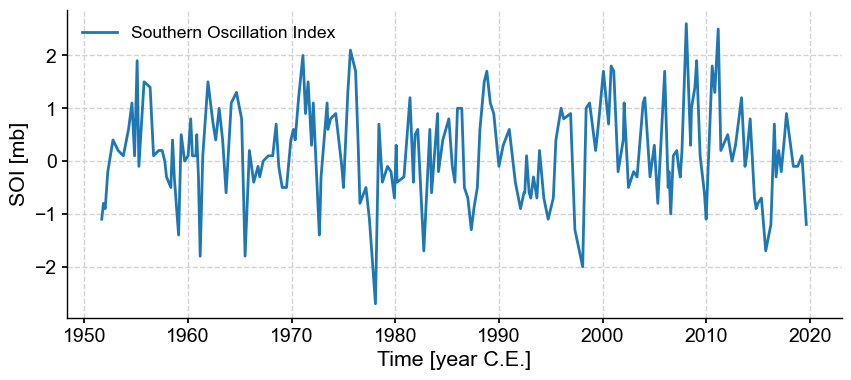

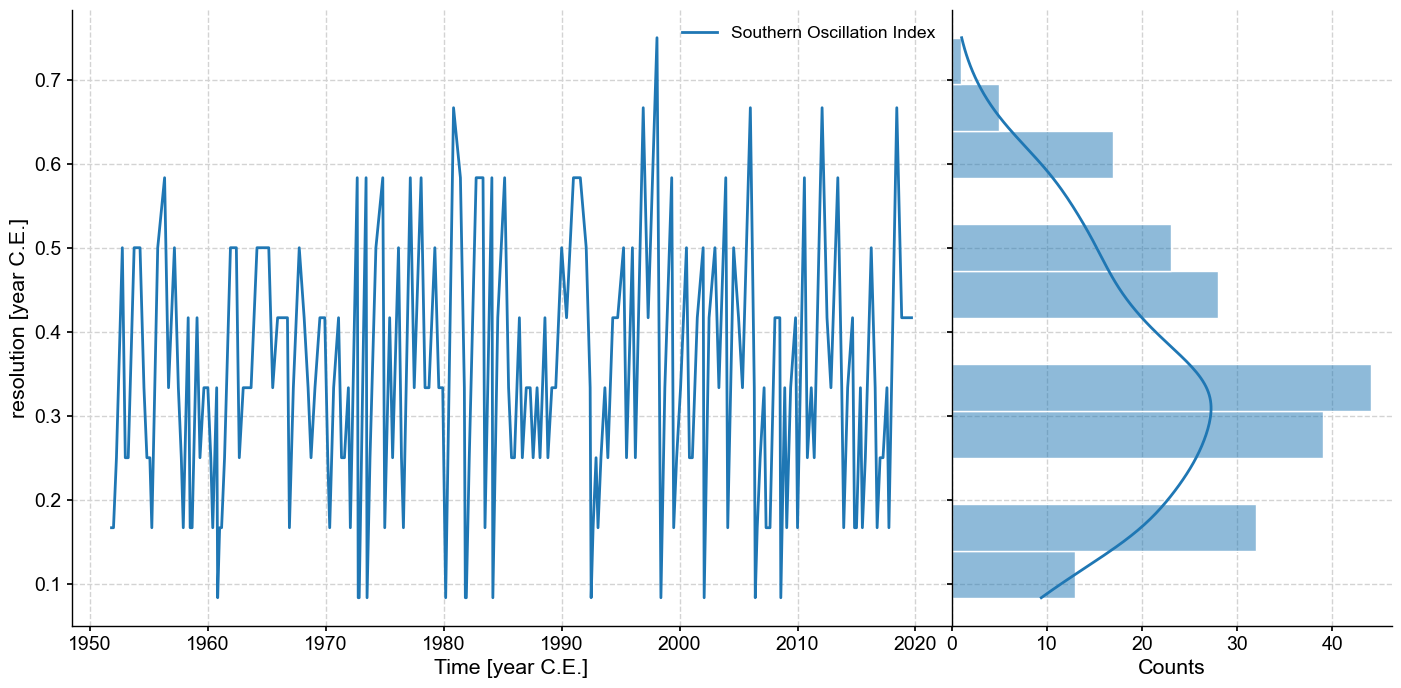

In [13]:
#Downsampling the data series using the poisson distribution
downsampled_series = downsample(series,method = 'poisson',param=[3],seed=42)
downsampled_series.plot()
downsampled_series.resolution().dashboard()

### Method = 'pareto'

The Pareto distribution is defined by two parameters: the shape parameter 'a' (also known as the Pareto index) and the scale parameter 'b'.

The 'a' parameter determines the shape of the distribution. A higher 'a' value makes the distribution more concentrated around the 'b' value, meaning there's a higher probability of selecting a smaller number of indices for removal. This results in less downsampling, and thus, more data is retained.

Conversely, a lower 'a' value makes the distribution more spread out, indicating a higher probability of selecting a larger number of indices for removal. This leads to more extensive downsampling, and consequently, less data is retained.

The 'b' parameter is the minimum possible value that can be drawn from the distribution. In the context of downsampling, this would be the minimum number of indices that would be removed. A higher 'b' value would mean that even at the minimum, more indices are removed, leading to more downsampling.

/Users/alexjames/miniconda3/envs/docs/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(<Figure size 1100x800 with 2 Axes>,
 {'res': <Axes: xlabel='Time [year C.E.]', ylabel='resolution [year C.E.]'>,
  'res_hist': <Axes: xlabel='Counts'>})

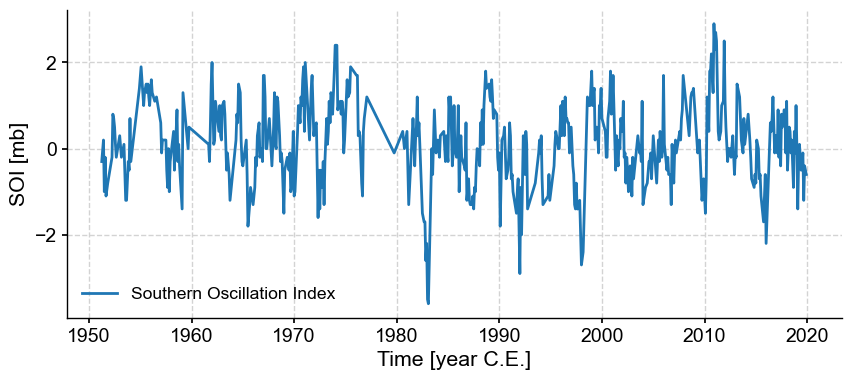

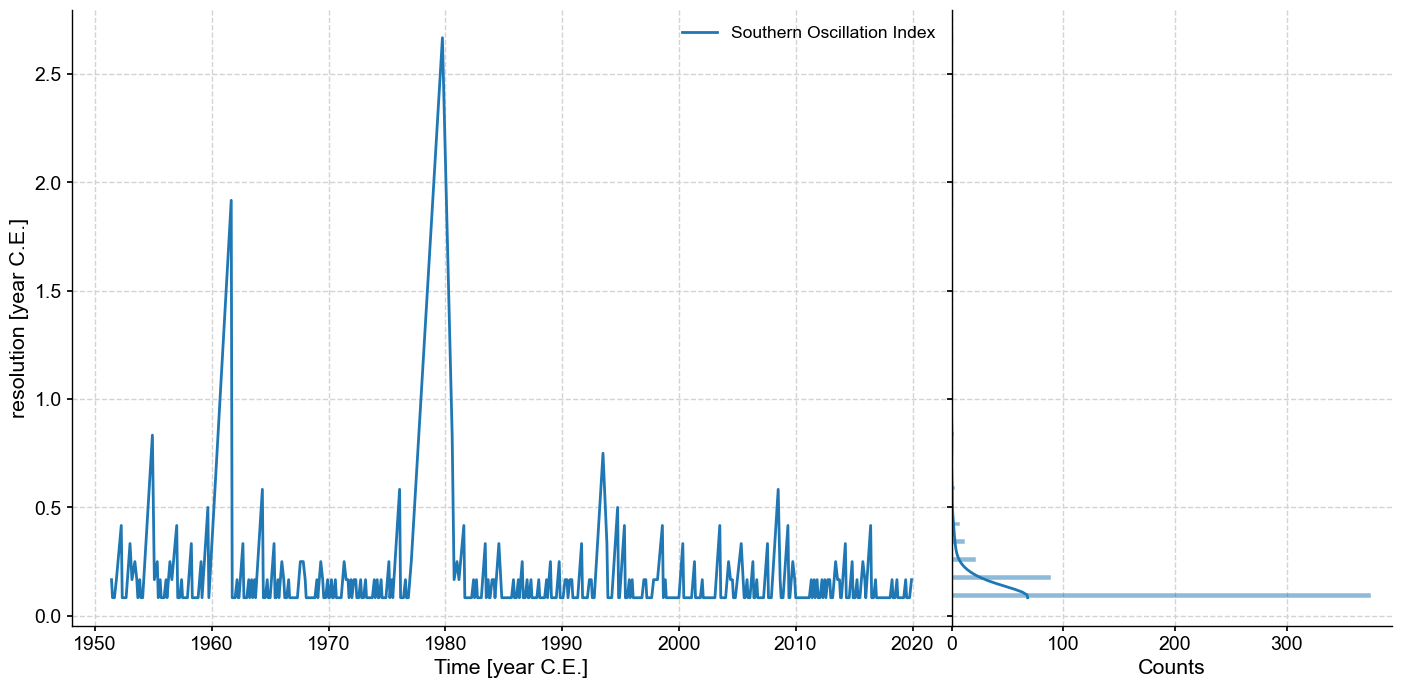

In [14]:
#Downsampling the data series using the poisson distribution
downsampled_series = downsample(series,method = 'pareto',param=[2,1],seed=42)
downsampled_series.plot()
downsampled_series.resolution().dashboard()

### Method = 'random_choice'

Random choice is a straightforward method that takes a 2-list (e.g. [[1,5][.90,.10]]) as it's `param` argument. The values in the first element of the 2-list ([1,5] in our example) indicate the values to use for the gap between index values, while the second element of the 2-list ([.90,.10]) indicate the probability that each value is used at each time step. The probabilities in the second element should always add up to 1. 

In the given example `param` = [[1,5],[.90,.10]], there is a 90% chance that the delta used will be 1 (and no values will be skipped) and a 10% chance the delta will be 5 (and 5 values will be skipped). 

/Users/alexjames/miniconda3/envs/docs/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(<Figure size 1100x800 with 2 Axes>,
 {'res': <Axes: xlabel='Time [year C.E.]', ylabel='resolution [year C.E.]'>,
  'res_hist': <Axes: xlabel='Counts'>})

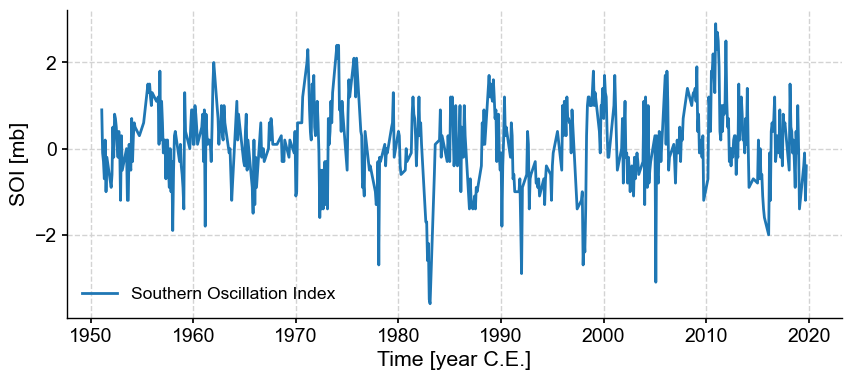

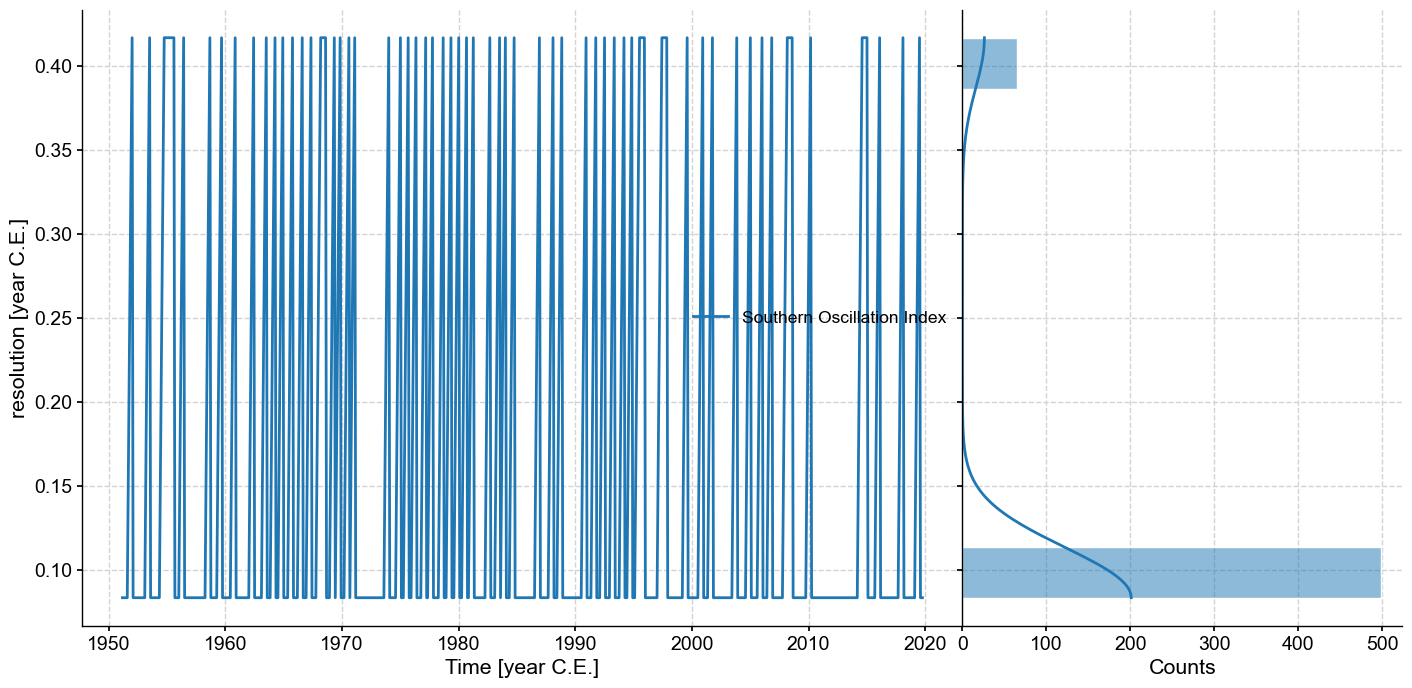

In [15]:
#Downsampling the data series using the poisson distribution
downsampled_series = downsample(series,method = 'random_choice',param=[[1,5],[.90,.1]],seed=42)
downsampled_series.plot()
downsampled_series.resolution().dashboard()

### Conclusion

Play around with each of these methods, the possibilites for different downsampling scenarios are endless! If you have suggestions for new methods, please submit them on the PaleoBeasts Github repo.